In [1]:
import jax
import jax.numpy as jnp
from matplotlib import pyplot as plt
from iceberg import Colors, Renderer
from abstractions.abstraction import Abstraction
from abstractions.computations import Model, mlp, Linear

In [2]:
hidden_dims = [32, 16, 16]
computation = mlp(10, hidden_dims)
maps = [Linear(output_dim=dim) for dim in hidden_dims]
model = Abstraction(computation=computation, tau_maps=maps)

In [3]:
vars = model.init(jax.random.PRNGKey(0), [jnp.ones(dim) for dim in hidden_dims])

In [4]:
vars["params"].keys()

frozen_dict_keys(['tau_maps', 'Dense_0', 'Dense_1', 'Dense_2'])

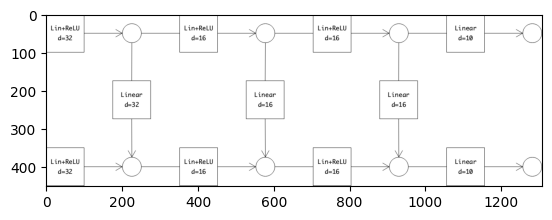

In [5]:
scene = model.get_drawable(full_model=Model(computation=computation))
renderer = Renderer()
renderer.render(scene, background_color=Colors.WHITE)
plt.imshow(renderer.get_rendered_image())

In [8]:
vars["params"]["tau_maps"].keys()

frozen_dict_keys(['Dense_0', 'Dense_1', 'Dense_2'])